In [85]:
import atomsci
import deepchem as dc
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import os
import requests
import sys
import io

In [64]:
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data
from atomsci.ddm.pipeline import model_pipeline as mp
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp

In [116]:
os.getcwd()

'/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/Optimal_Model'

In [5]:
working_dir = os.getcwd()

In [117]:
cd /home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/

/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization


In [118]:
curated_df = pd.read_csv('select_qm9_data_curated.csv')

In [4]:
curated_file = os.path.join('select_qm9_data_curated.csv')
curated_df.to_csv(curated_file, index=False)

In [7]:
curated_df.head()

mol_id smiles    homo    lumo     gap rdkit_smiles  \
0  gdb_1      C -0.3877  0.1171  0.5048            C   
1  gdb_2      N -0.2570  0.0829  0.3399            N   
2  gdb_3      O -0.2928  0.0687  0.3615            O   
3  gdb_4    C#C -0.2845  0.0506  0.3351          C#C   
4  gdb_5    C#N -0.3604  0.0191  0.3796          C#N   

                     inchi_key                  compound_id     mol_wt  \
0  VNWKTOKETHGBQD-UHFFFAOYSA-N  VNWKTOKETHGBQD-UHFFFAOYSA-N  16.031300   
1  QGZKDVFQNNGYKY-UHFFFAOYSA-N  QGZKDVFQNNGYKY-UHFFFAOYSA-N  17.026549   
2  XLYOFNOQVPJJNP-UHFFFAOYSA-N  XLYOFNOQVPJJNP-UHFFFAOYSA-N  18.010565   
3  HSFWRNGVRCDJHI-UHFFFAOYSA-N  HSFWRNGVRCDJHI-UHFFFAOYSA-N  26.015650   
4  LELOWRISYMNNSU-UHFFFAOYSA-N  LELOWRISYMNNSU-UHFFFAOYSA-N  27.010899   

   VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
0          0.5048            NaN       0.0                    0  
1          0.3399            NaN       0.0                    0  
2          0.3615            NaN       0.0                    0  
3          0.3351            NaN       0.0                    0  
4          0.3796            NaN       0.0                    0

In [119]:
curated_df.shape

(129435, 13)

In [9]:
import atomsci.ddm.pipeline.diversity_plots as dp

dist subset
0  1.00    all
1  1.00    all
2  1.00    all
3  0.75    all
4  0.75    all

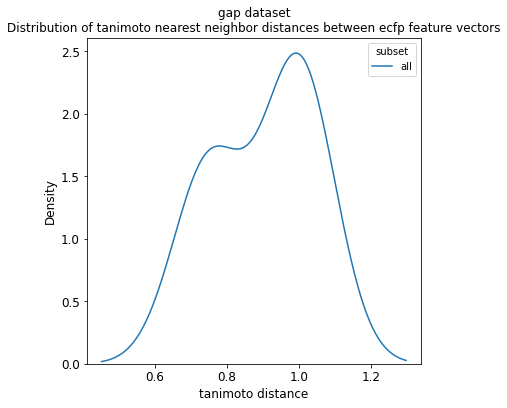

In [13]:
dp.plot_tani_dist_distr(curated_df.head(), 'rdkit_smiles', 'gap') 

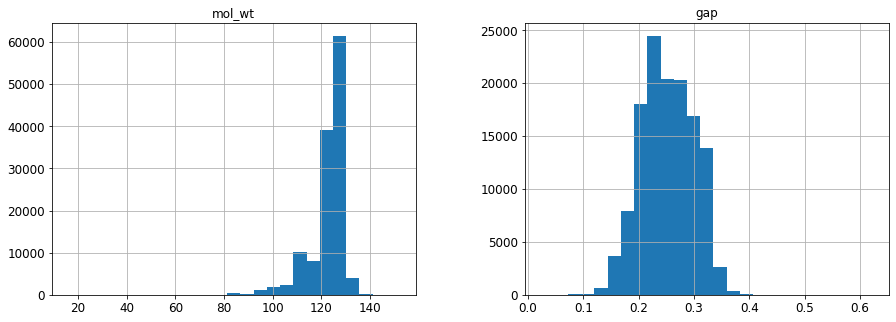

In [10]:
numeric_cols=['mol_wt','gap']
curated_df[numeric_cols].hist(figsize=(15,5), bins=25);

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
p
plt.show()

In [11]:
curated_df[numeric_cols].describe()

mol_wt            gap
count  129435.000000  129435.000000
mean      122.692994       0.252584
std         7.570944       0.047279
min        16.031300       0.024600
25%       121.089149       0.217500
50%       125.047678       0.251500
75%       127.063329       0.289900
max       152.006069       0.622100

In [16]:
featurizer = 'ecfp' #featurizer = 'graphconv'
model_type ='RF'
response_cols = ['VALUE_NUM_mean']

In [12]:
#Model 1: RF, default split, epochs 5, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '5',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-06 21:03:57,718 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [13]:
pl.train_model()

2023-07-06 21:04:10,955 Attempting to load featurized dataset
2023-07-06 21:04:11,541 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-06 21:04:11,542 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-06 21:04:12,149 Featurizing sample 0
2023-07-06 21:04:13,423 Featurizing sample 1000
2023-07-06 21:04:14,670 Featurizing sample 2000
2023-07-06 21:04:15,949 Featurizing sample 3000
2023-07-06 21:04:17,260 Featurizing sample 4000
2023-07-06 21:04:18,586 Featurizing sample 5000
2023-07-06 21:04:19,897 Featurizing sample 6000
2023-07-06 21:04:21,200 Featurizing sample 7000
2023-07-06 21:04:22,494 Featurizing sample 8000
2023-07-06 21:04:23,773 Featurizing sample 9000
2023-07-06 21:04:25,064 Featurizing sample 10000
2023-07-06 21:04:26,367 Featurizing sample 11000
2023-07-06 21:04:27,693 Featurizing sample 12000
2023-07-06 21:04:29,001 Featurizing sample 13000
2023-07-06 21:04

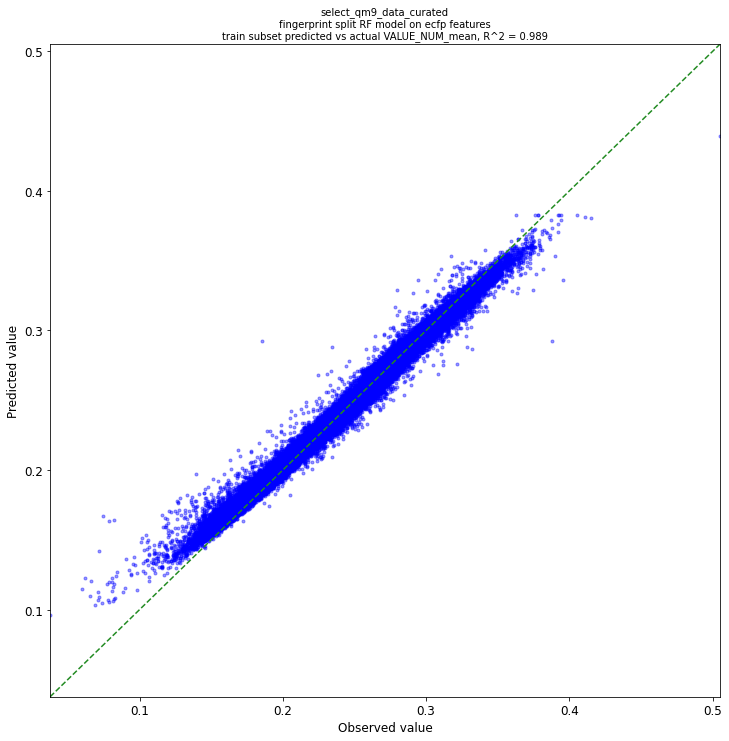

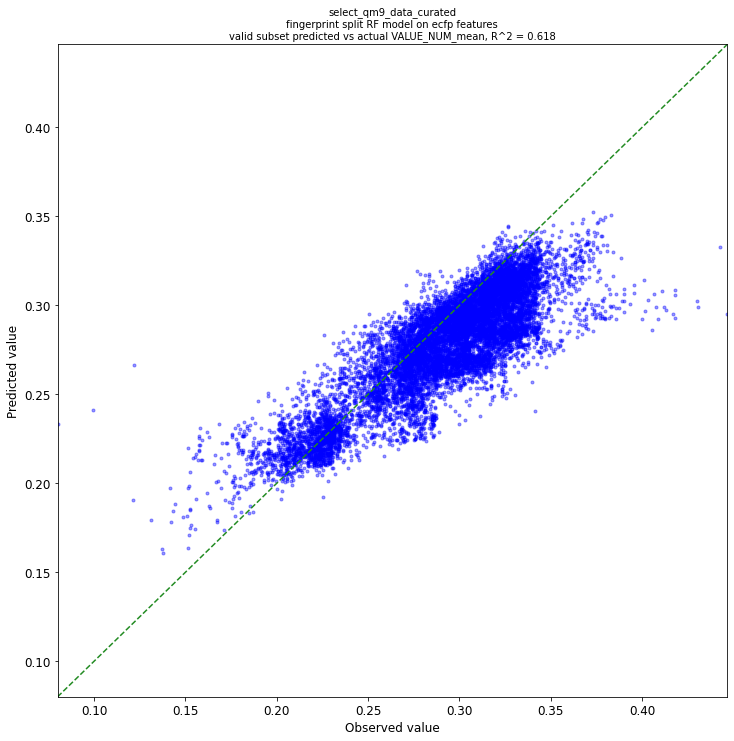

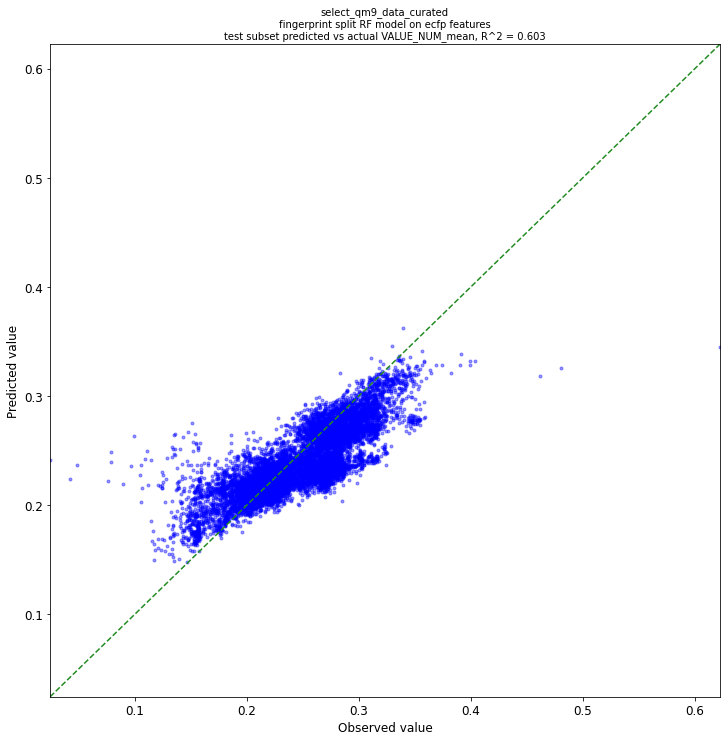

In [14]:
pp.plot_pred_vs_actual(pl)

In [11]:
#Model 2: NN, default split, epochs 5, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '5',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-06 22:29:45,075 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [12]:
pl.train_model()

2023-07-06 22:30:01,069 Attempting to load featurized dataset
2023-07-06 22:30:01,709 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-06 22:30:01,710 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-06 22:30:02,429 Featurizing sample 0
2023-07-06 22:30:03,778 Featurizing sample 1000
2023-07-06 22:30:05,061 Featurizing sample 2000
2023-07-06 22:30:06,355 Featurizing sample 3000
2023-07-06 22:30:07,657 Featurizing sample 4000
2023-07-06 22:30:08,986 Featurizing sample 5000
2023-07-06 22:30:10,307 Featurizing sample 6000
2023-07-06 22:30:11,611 Featurizing sample 7000
2023-07-06 22:30:12,935 Featurizing sample 8000
2023-07-06 22:30:14,239 Featurizing sample 9000
2023-07-06 22:30:15,500 Featurizing sample 10000
2023-07-06 22:30:16,810 Featurizing sample 11000
2023-07-06 22:30:18,122 Featurizing sample 12000
2023-07-06 22:30:19,399 Featurizing sample 13000
2023-07-06 22:30

['select_qm9_data_curated/NN_ecfp_fingerprint_regression/05f1fc9d-d83e-4f2e-9155-348ba2952179/model/checkpoint1.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/05f1fc9d-d83e-4f2e-9155-348ba2952179/model/checkpoint2.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/05f1fc9d-d83e-4f2e-9155-348ba2952179/model/checkpoint3.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/05f1fc9d-d83e-4f2e-9155-348ba2952179/model/checkpoint4.pt']
select_qm9_data_curated/NN_ecfp_fingerprint_regression/05f1fc9d-d83e-4f2e-9155-348ba2952179/model/checkpoint1.pt


2023-07-06 23:14:53,759 Wrote model tarball to select_qm9_data_curated_model_05f1fc9d-d83e-4f2e-9155-348ba2952179.tar.gz


In [ ]:
pp.plot_pred_vs_actual(pl)

In [17]:
#Model 3: RF, default split, epochs 10, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '10',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-07 17:53:53,504 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [18]:
pl.train_model()

2023-07-07 17:54:05,628 Attempting to load featurized dataset
2023-07-07 17:54:06,235 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-07 17:54:06,237 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-07 17:54:10,453 Featurizing sample 0
2023-07-07 17:54:11,770 Featurizing sample 1000
2023-07-07 17:54:13,044 Featurizing sample 2000
2023-07-07 17:54:14,323 Featurizing sample 3000
2023-07-07 17:54:15,650 Featurizing sample 4000
2023-07-07 17:54:17,016 Featurizing sample 5000
2023-07-07 17:54:18,347 Featurizing sample 6000
2023-07-07 17:54:19,684 Featurizing sample 7000
2023-07-07 17:54:21,022 Featurizing sample 8000
2023-07-07 17:54:22,320 Featurizing sample 9000
2023-07-07 17:54:23,636 Featurizing sample 10000
2023-07-07 17:54:24,927 Featurizing sample 11000
2023-07-07 17:54:26,229 Featurizing sample 12000
2023-07-07 17:54:27,562 Featurizing sample 13000
2023-07-07 17:54

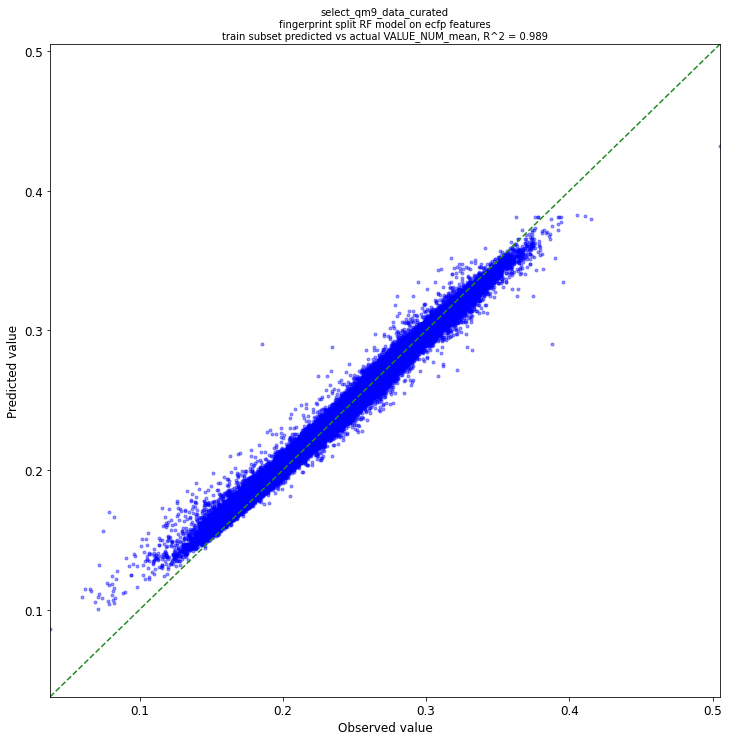

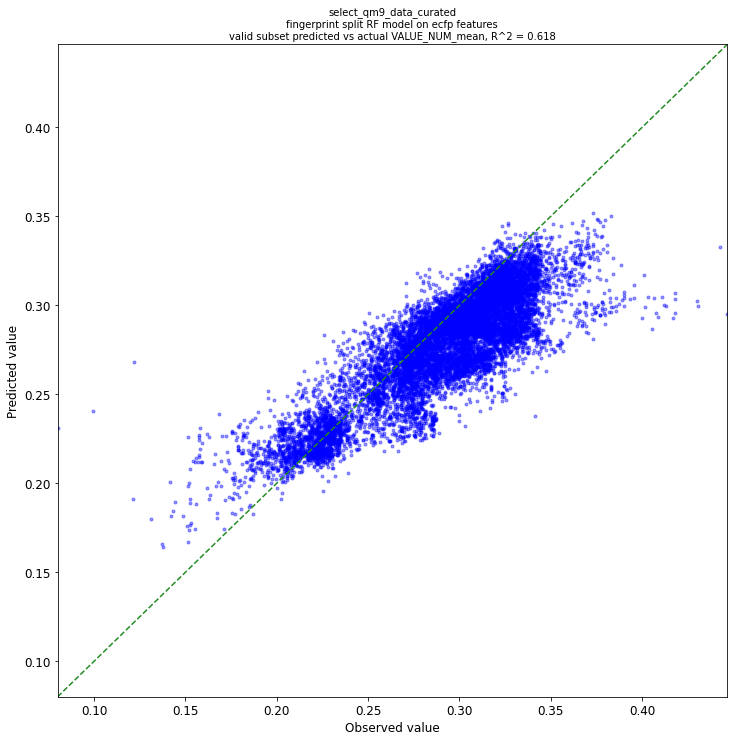

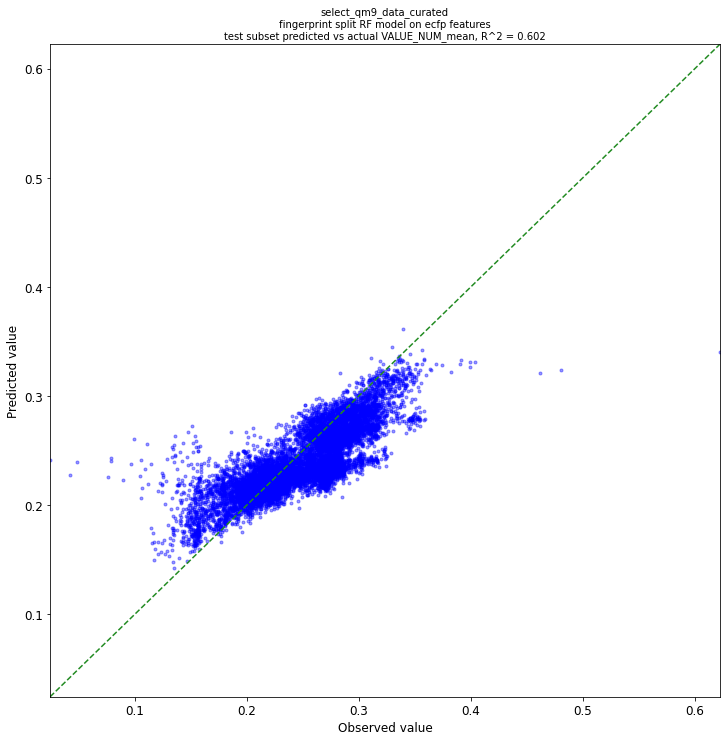

In [19]:
pp.plot_pred_vs_actual(pl)

In [20]:
#Model 4: NN, default split, epochs 10, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '10',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-07 19:25:21,899 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [21]:
pl.train_model()

2023-07-07 19:25:33,464 Attempting to load featurized dataset
2023-07-07 19:25:34,092 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-07 19:25:34,093 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-07 19:25:34,722 Featurizing sample 0
2023-07-07 19:25:36,022 Featurizing sample 1000
2023-07-07 19:25:37,278 Featurizing sample 2000
2023-07-07 19:25:38,591 Featurizing sample 3000
2023-07-07 19:25:39,950 Featurizing sample 4000
2023-07-07 19:25:41,268 Featurizing sample 5000
2023-07-07 19:25:42,566 Featurizing sample 6000
2023-07-07 19:25:43,833 Featurizing sample 7000
2023-07-07 19:25:45,670 Featurizing sample 8000
2023-07-07 19:25:46,965 Featurizing sample 9000
2023-07-07 19:25:48,257 Featurizing sample 10000
2023-07-07 19:25:49,548 Featurizing sample 11000
2023-07-07 19:25:50,837 Featurizing sample 12000
2023-07-07 19:25:52,142 Featurizing sample 13000
2023-07-07 19:25

['select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint1.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint2.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint3.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint4.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint5.pt']
select_qm9_data_curated/NN_ecfp_fingerprint_regression/9fc65221-81c5-43c6-b29b-ea86055de670/model/checkpoint1.pt


2023-07-07 20:15:57,235 Wrote model tarball to select_qm9_data_curated_model_9fc65221-81c5-43c6-b29b-ea86055de670.tar.gz


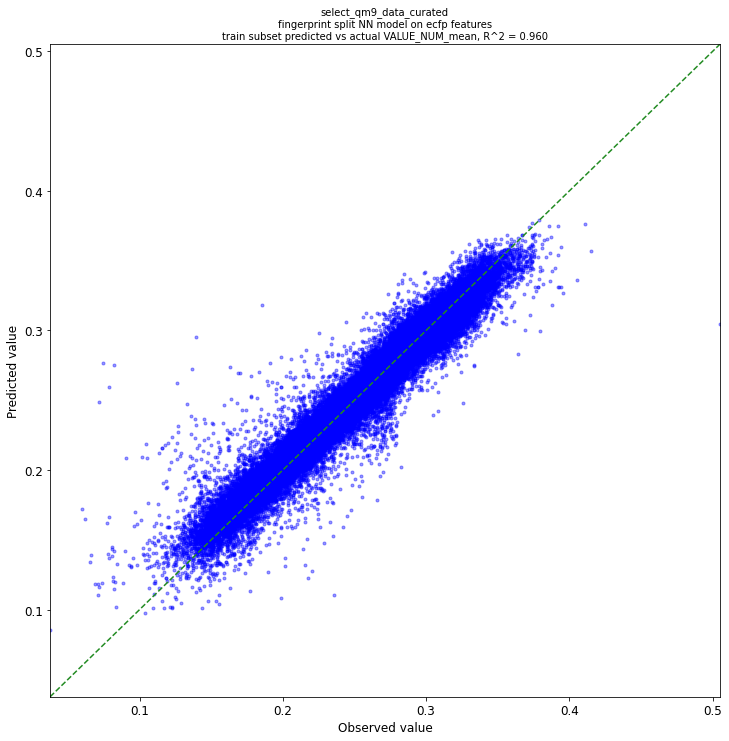

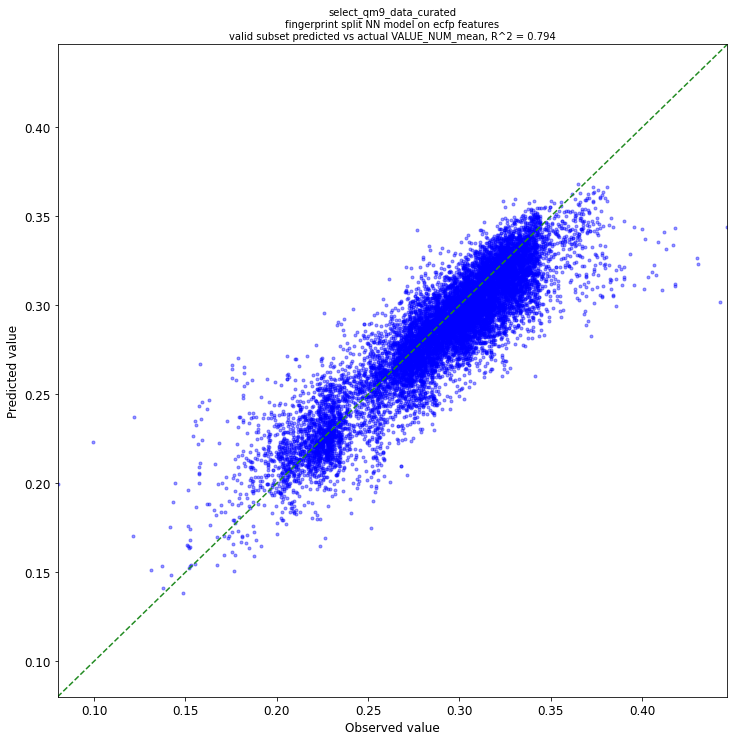

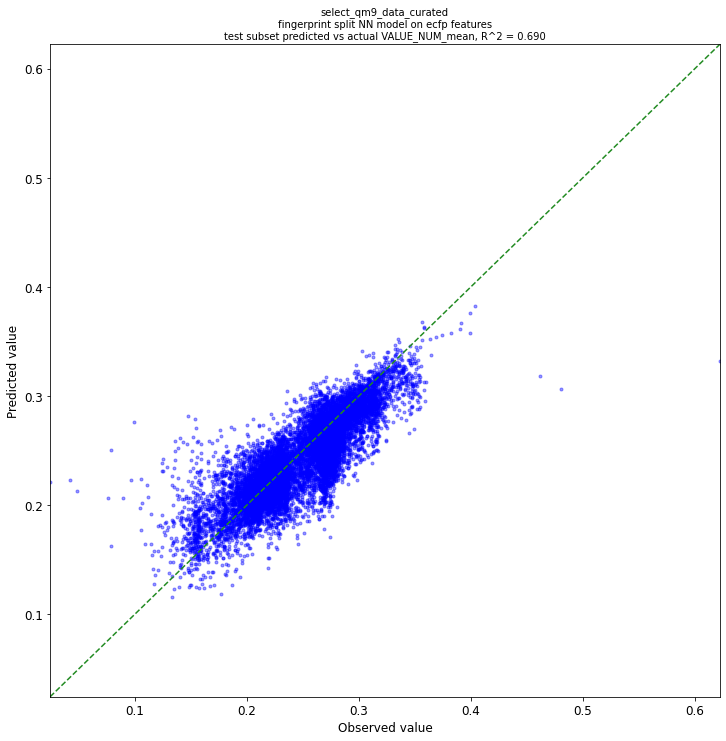

In [22]:
pp.plot_pred_vs_actual(pl)

In [16]:
#Model 5: RF, default split, epochs 20, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '20',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-10 16:36:16,564 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [17]:
pl.train_model()

2023-07-10 16:36:21,185 Attempting to load featurized dataset
2023-07-10 16:36:21,822 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-10 16:36:21,823 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-10 16:36:22,462 Featurizing sample 0
2023-07-10 16:36:23,739 Featurizing sample 1000
2023-07-10 16:36:25,055 Featurizing sample 2000
2023-07-10 16:36:26,382 Featurizing sample 3000
2023-07-10 16:36:27,697 Featurizing sample 4000
2023-07-10 16:36:29,025 Featurizing sample 5000
2023-07-10 16:36:30,335 Featurizing sample 6000
2023-07-10 16:36:31,638 Featurizing sample 7000
2023-07-10 16:36:32,981 Featurizing sample 8000
2023-07-10 16:36:34,304 Featurizing sample 9000
2023-07-10 16:36:35,614 Featurizing sample 10000
2023-07-10 16:36:36,926 Featurizing sample 11000
2023-07-10 16:36:38,243 Featurizing sample 12000
2023-07-10 16:36:39,587 Featurizing sample 13000
2023-07-10 16:36

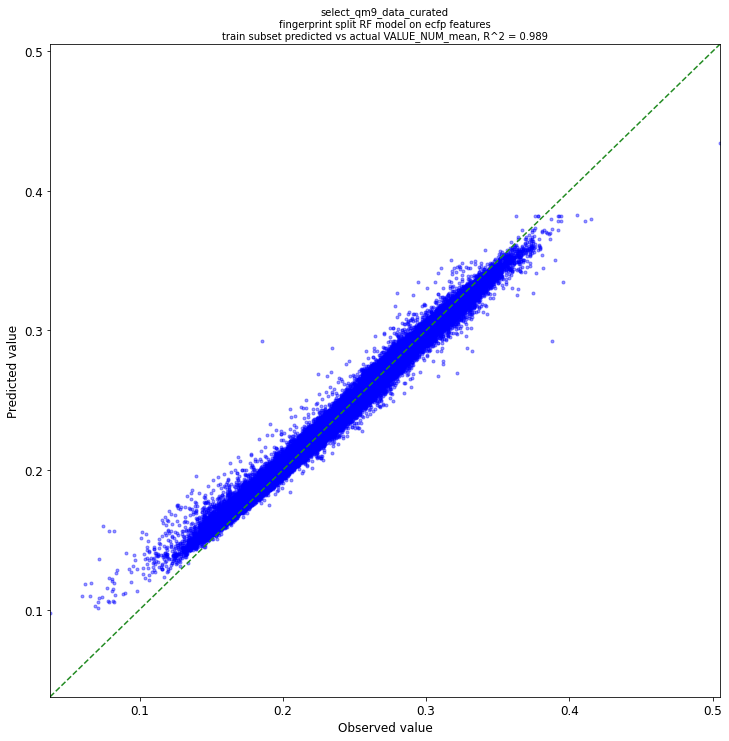

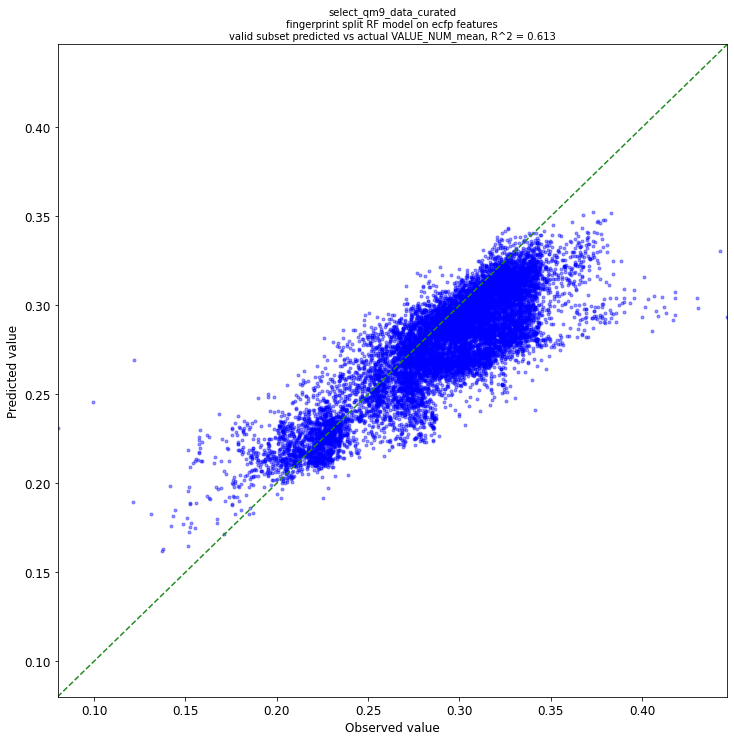

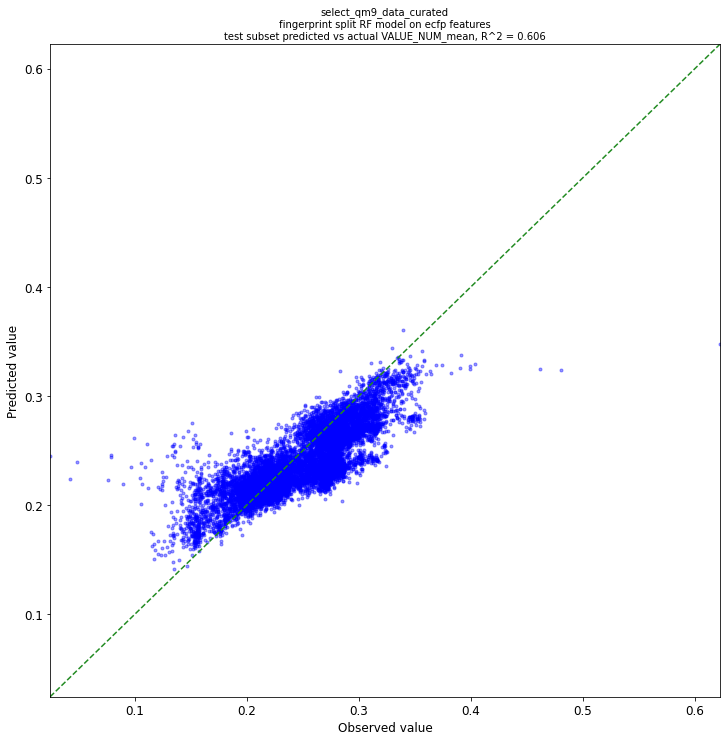

In [18]:
pp.plot_pred_vs_actual(pl)

In [21]:
#Model 6: NN, default split, epochs 20, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '20',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-10 18:22:59,611 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [22]:
pl.train_model()

2023-07-10 18:23:03,174 Attempting to load featurized dataset
2023-07-10 18:23:03,840 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-10 18:23:03,841 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-10 18:23:04,477 Featurizing sample 0
2023-07-10 18:23:05,831 Featurizing sample 1000
2023-07-10 18:23:07,192 Featurizing sample 2000
2023-07-10 18:23:08,526 Featurizing sample 3000
2023-07-10 18:23:09,947 Featurizing sample 4000
2023-07-10 18:23:11,356 Featurizing sample 5000
2023-07-10 18:23:12,735 Featurizing sample 6000
2023-07-10 18:23:14,153 Featurizing sample 7000
2023-07-10 18:23:15,534 Featurizing sample 8000
2023-07-10 18:23:16,861 Featurizing sample 9000
2023-07-10 18:23:18,211 Featurizing sample 10000
2023-07-10 18:23:19,601 Featurizing sample 11000
2023-07-10 18:23:21,012 Featurizing sample 12000
2023-07-10 18:23:22,420 Featurizing sample 13000
2023-07-10 18:23

['select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint1.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint2.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint3.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint4.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint5.pt']
select_qm9_data_curated/NN_ecfp_fingerprint_regression/fc87c488-1591-41a8-8c51-8333ff0bb454/model/checkpoint1.pt


2023-07-10 19:25:14,537 Wrote model tarball to select_qm9_data_curated_model_fc87c488-1591-41a8-8c51-8333ff0bb454.tar.gz


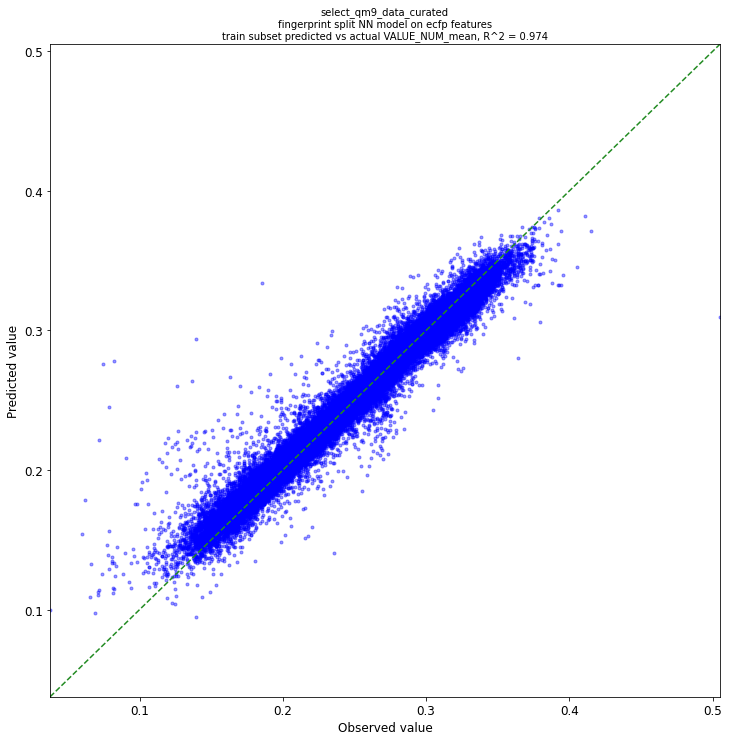

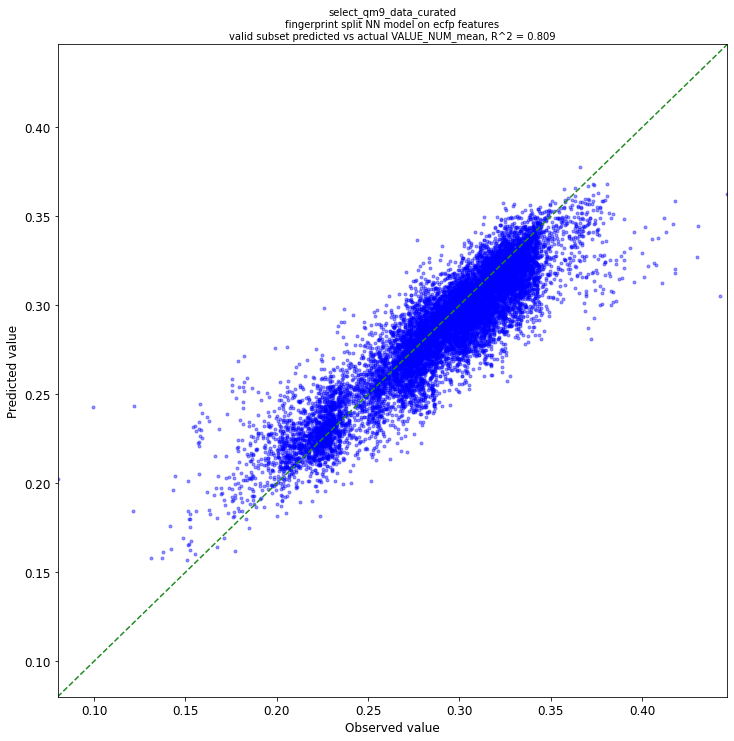

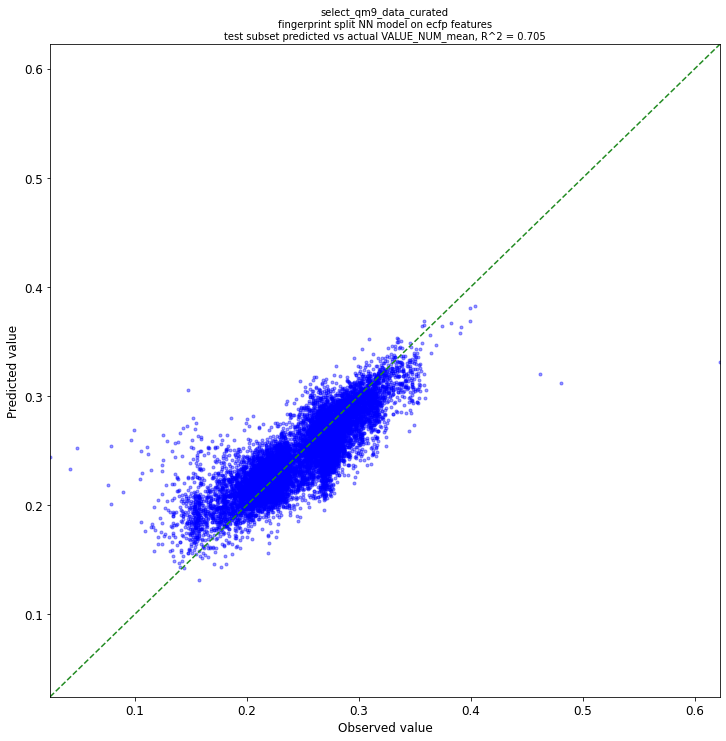

In [23]:
pp.plot_pred_vs_actual(pl)

In [26]:
#Model 7: NN, default split, epochs 50, ecfp
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "fingerprint",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '50',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-10 21:12:26,553 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [27]:
pl.train_model()

2023-07-10 21:12:29,351 Attempting to load featurized dataset
2023-07-10 21:12:29,951 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-10 21:12:29,952 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-10 21:12:30,570 Featurizing sample 0
2023-07-10 21:12:31,908 Featurizing sample 1000
2023-07-10 21:12:33,220 Featurizing sample 2000
2023-07-10 21:12:34,534 Featurizing sample 3000
2023-07-10 21:12:35,871 Featurizing sample 4000
2023-07-10 21:12:37,209 Featurizing sample 5000
2023-07-10 21:12:38,518 Featurizing sample 6000
2023-07-10 21:12:39,835 Featurizing sample 7000
2023-07-10 21:12:41,173 Featurizing sample 8000
2023-07-10 21:12:42,479 Featurizing sample 9000
2023-07-10 21:12:43,800 Featurizing sample 10000
2023-07-10 21:12:45,134 Featurizing sample 11000
2023-07-10 21:12:46,478 Featurizing sample 12000
2023-07-10 21:12:47,800 Featurizing sample 13000
2023-07-10 21:12

['select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint1.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint2.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint3.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint4.pt', 'select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint5.pt']
select_qm9_data_curated/NN_ecfp_fingerprint_regression/92a68098-fc71-492d-91d8-535ed7f5cb56/model/checkpoint1.pt


2023-07-10 22:35:21,572 Wrote model tarball to select_qm9_data_curated_model_92a68098-fc71-492d-91d8-535ed7f5cb56.tar.gz


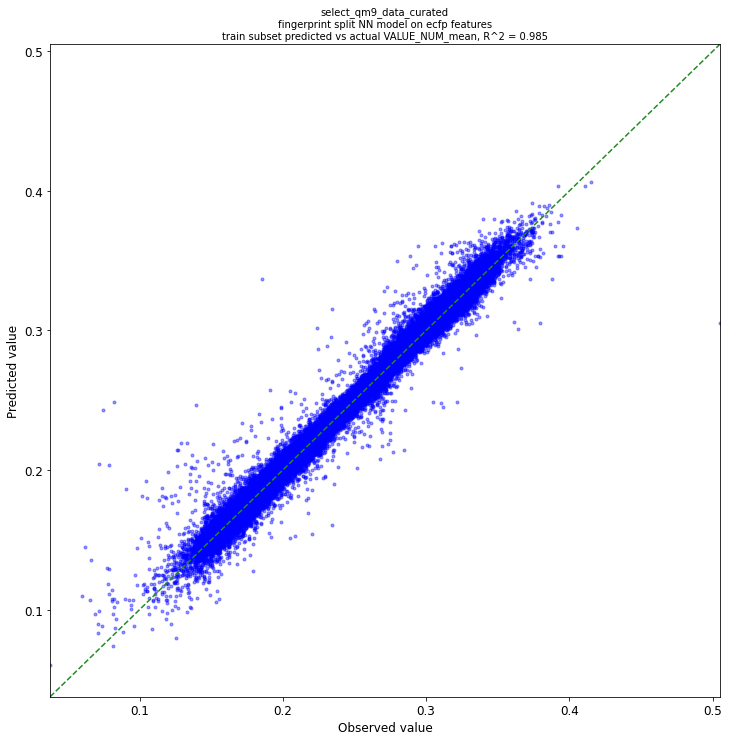

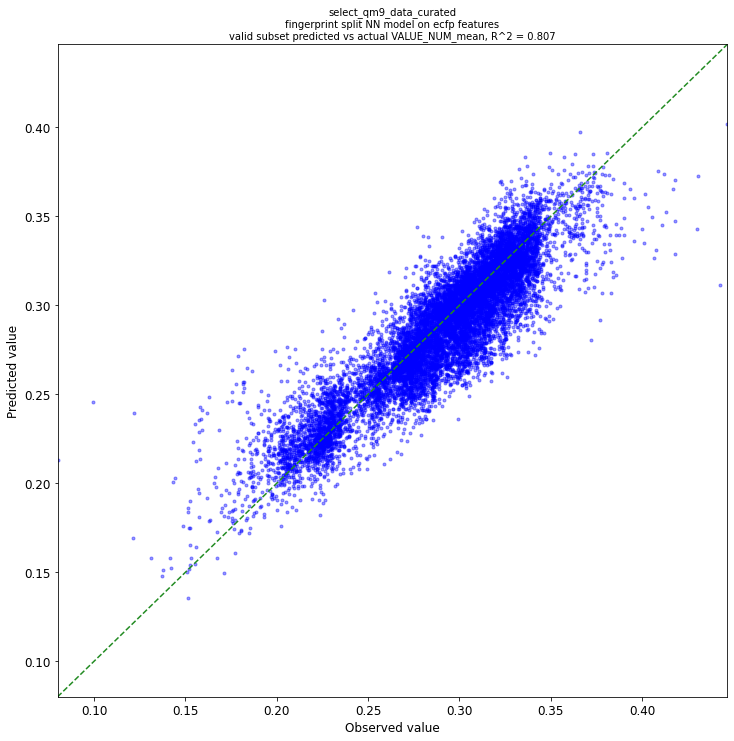

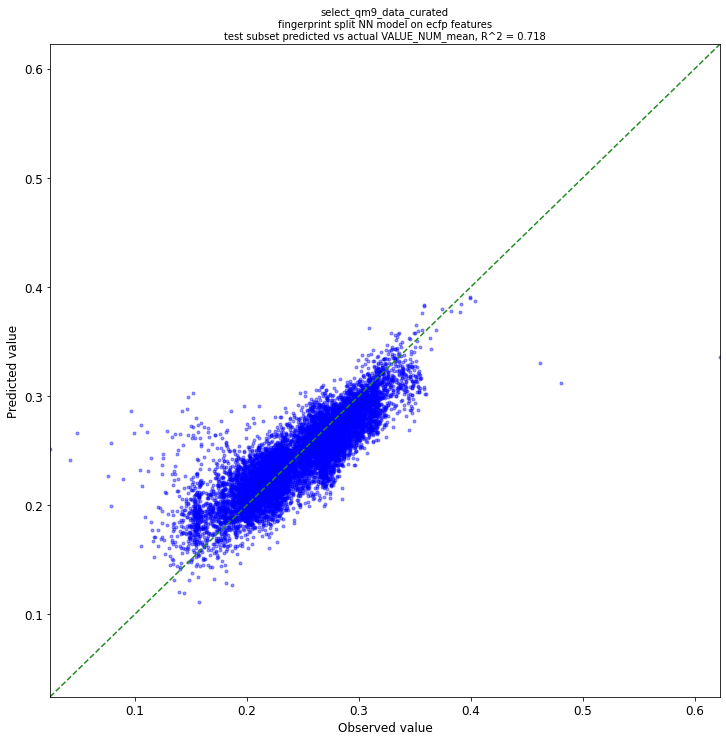

In [28]:
pp.plot_pred_vs_actual(pl)

In [69]:
cd /home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/

/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization


In [71]:
#Model 8: NN, default split, epochs 10, ecfp, scaffold --> model we use
response_col = ['VALUE_NUM_mean']
compound_id = "compound_id"
smiles_col = "rdkit_smiles"

params = {
        "verbose": "True",
        "datastore": "False",
        "save_results": "False",
        "prediction_type": "regression",
        "dataset_key": curated_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "False",
        "split_strategy": "train_valid_test",
        "splitter": "scaffold",
      #  "split_valid_frac": "0.10",
       # "split_test_frac": "0.10",
        "featurizer": "ecfp",
        "model_type": "NN",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '10',
        "rerun": "False",
        "result_dir": ""
        # "ampl_version": " "
    }
ampl_param = parse.wrapper(params)
pl = mp.ModelPipeline(ampl_param)

2023-07-18 00:01:47,386 Created a dataset hash 'ae754ed88fc106c31c9fea2b886ab532' from dataset_key '/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/select_qm9_data_curated.csv'


In [72]:
pl.train_model()

2023-07-18 00:01:49,401 Attempting to load featurized dataset
2023-07-18 00:01:50,027 Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
2023-07-18 00:01:50,028 Featurized dataset not previously saved for dataset select_qm9_data_curated, creating new
2023-07-18 00:01:50,660 Featurizing sample 0
2023-07-18 00:01:51,974 Featurizing sample 1000
2023-07-18 00:01:53,289 Featurizing sample 2000
2023-07-18 00:01:54,614 Featurizing sample 3000
2023-07-18 00:01:55,954 Featurizing sample 4000
2023-07-18 00:01:57,328 Featurizing sample 5000
2023-07-18 00:01:58,638 Featurizing sample 6000
2023-07-18 00:01:59,959 Featurizing sample 7000
2023-07-18 00:02:01,313 Featurizing sample 8000
2023-07-18 00:02:02,710 Featurizing sample 9000
2023-07-18 00:02:04,097 Featurizing sample 10000
2023-07-18 00:02:05,447 Featurizing sample 11000
2023-07-18 00:02:06,809 Featurizing sample 12000
2023-07-18 00:02:08,212 Featurizing sample 13000
2023-07-18 00:02

['select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint1.pt', 'select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint2.pt', 'select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint3.pt', 'select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint4.pt', 'select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint5.pt']
select_qm9_data_curated/NN_ecfp_scaffold_regression/773d2be4-54b2-4bf5-b289-689d2f1cee87/model/checkpoint1.pt


2023-07-18 00:12:00,806 Wrote model tarball to select_qm9_data_curated_model_773d2be4-54b2-4bf5-b289-689d2f1cee87.tar.gz


<Figure size 360x360 with 0 Axes>

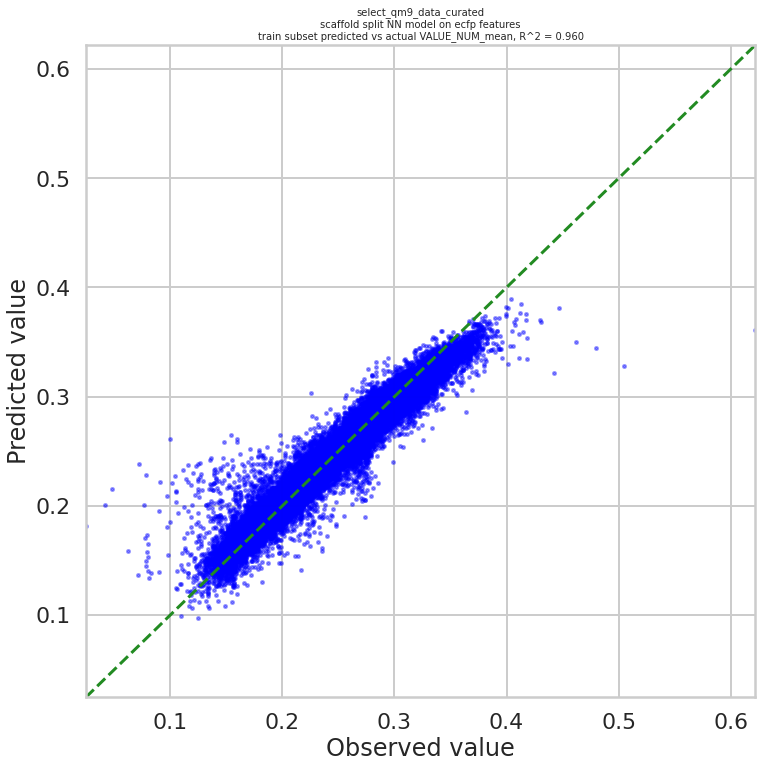

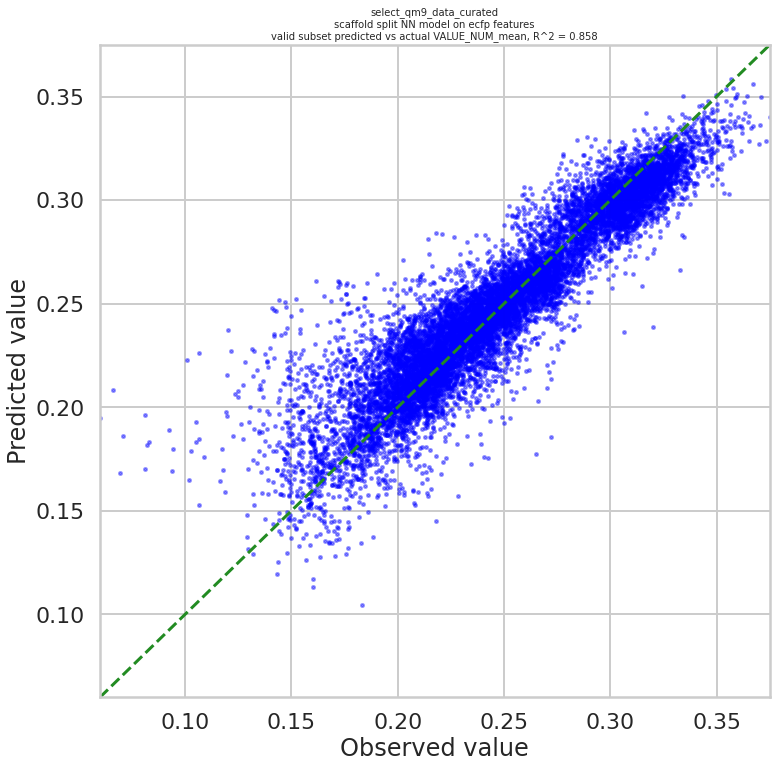

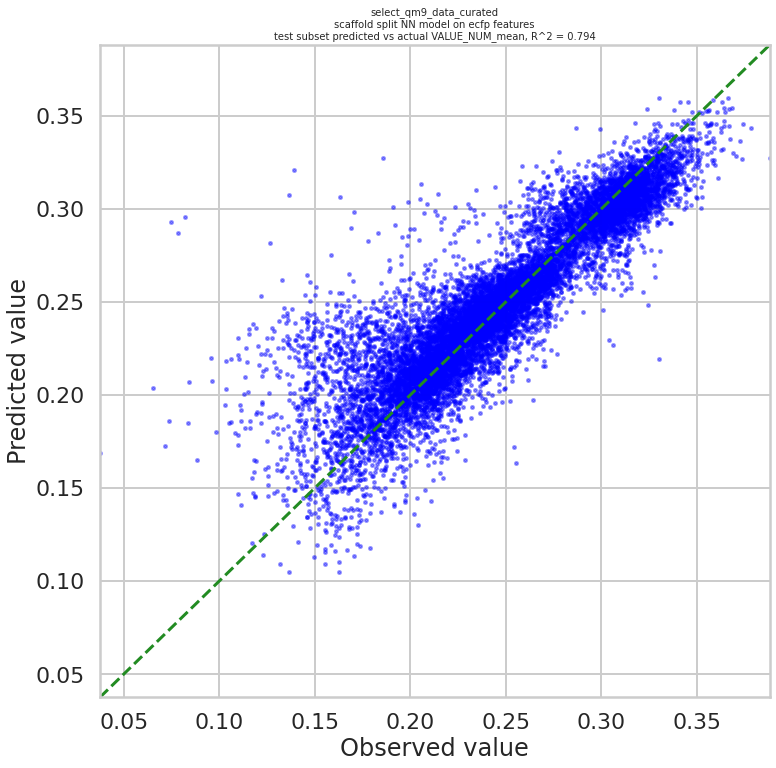

<Figure size 360x360 with 0 Axes>

In [75]:
pp.plot_pred_vs_actual(pl)
plt.figure(figsize=(5,5))

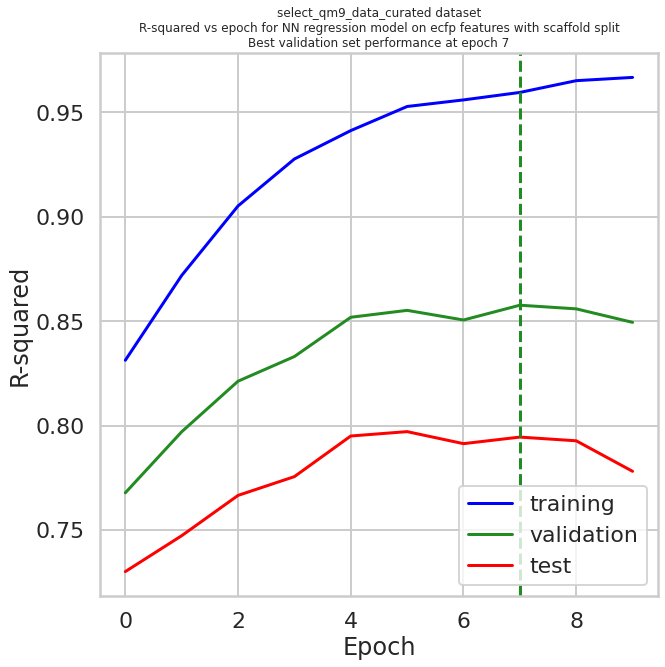

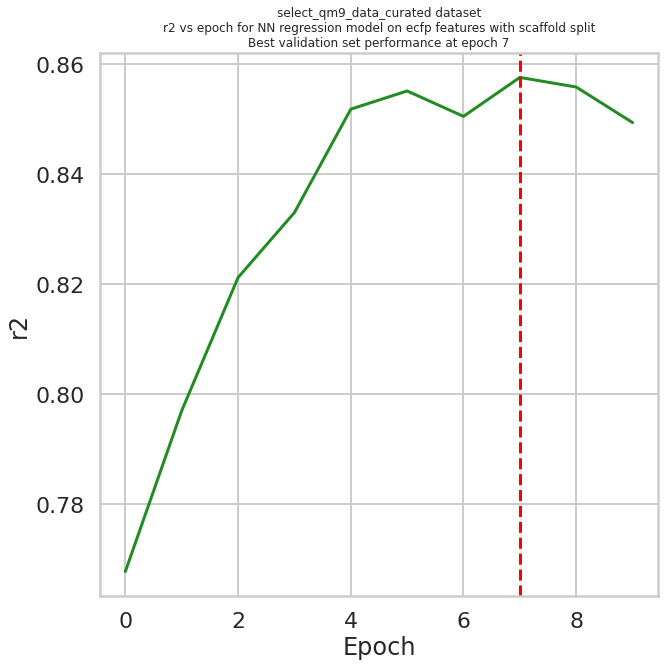

In [76]:
pp.plot_perf_vs_epoch(pl)

In [45]:
cd /home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization

/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization


In [79]:
cd /home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/Optimal_Model

/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/Optimal_Model


In [77]:
!tar -tf *.tar.gz

tar: select_qm9_data_curated_model_6666a450-9253-4556-8c2f-5ad91513cf5a.tar.gz: Not found in archive
tar: select_qm9_data_curated_model_773d2be4-54b2-4bf5-b289-689d2f1cee87.tar.gz: Not found in archive
tar: Exiting with failure status due to previous errors


In [78]:
pwd

'/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization'

In [20]:
!tar -xvzf *.tar.gz

./best_model/
./best_model/checkpoint1.pt
./model_metadata.json
./model_metrics.json
./transformers.pkl


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")

import pandas as pd
import os, json, sys, glob, pickle

In [100]:
#test_data = pd.read_csv('QMUGS_raw.csv')
test_data = pd.read_csv('qm9__curated-Copy1.csv')

In [101]:
test_data.head()

mol_id smiles    homo    lumo     gap rdkit_smiles  \
0  gdb_1      C -0.3877  0.1171  0.5048            C   
1  gdb_2      N -0.2570  0.0829  0.3399            N   
2  gdb_3      O -0.2928  0.0687  0.3615            O   
3  gdb_4    C#C -0.2845  0.0506  0.3351          C#C   
4  gdb_5    C#N -0.3604  0.0191  0.3796          C#N   

                     inchi_key                  compound_id     mol_wt  \
0  VNWKTOKETHGBQD-UHFFFAOYSA-N  VNWKTOKETHGBQD-UHFFFAOYSA-N  16.031300   
1  QGZKDVFQNNGYKY-UHFFFAOYSA-N  QGZKDVFQNNGYKY-UHFFFAOYSA-N  17.026549   
2  XLYOFNOQVPJJNP-UHFFFAOYSA-N  XLYOFNOQVPJJNP-UHFFFAOYSA-N  18.010565   
3  HSFWRNGVRCDJHI-UHFFFAOYSA-N  HSFWRNGVRCDJHI-UHFFFAOYSA-N  26.015650   
4  LELOWRISYMNNSU-UHFFFAOYSA-N  LELOWRISYMNNSU-UHFFFAOYSA-N  27.010899   

   VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
0          0.5048            NaN       0.0                    0  
1          0.3399            NaN       0.0                    0  
2          0.3615            NaN       0.0                    0  
3          0.3351            NaN       0.0                    0  
4          0.3796            NaN       0.0                    0

In [34]:
test_data = test_data.head(100) #small set

In [83]:
test_data['rdkit_smiles'] = test_data['smiles'].apply(curate_data.base_smiles_from_smiles)
test_data['inchi_key'] = test_data['rdkit_smiles'].apply(struct_utils.smiles_to_inchi_key)
test_data['compound_id'] = test_data['inchi_key']

[00:21:10] Can't kekulize mol.  Unkekulized atoms: 3 5 27 28 30 33
[00:21:10] Can't kekulize mol.  Unkekulized atoms: 3 5 27 28 30 33
[00:21:10] Can't kekulize mol.  Unkekulized atoms: 3 5 27 28 30 33
[00:21:50] Can't kekulize mol.  Unkekulized atoms: 3 10
[00:21:50] Can't kekulize mol.  Unkekulized atoms: 3 10
[00:21:50] Can't kekulize mol.  Unkekulized atoms: 3 10
[00:22:43] Can't kekulize mol.  Unkekulized atoms: 3 5 25 26 27 28
[00:22:43] Can't kekulize mol.  Unkekulized atoms: 3 5 25 26 27 28
[00:22:43] Can't kekulize mol.  Unkekulized atoms: 3 5 25 26 27 28
[00:22:45] Can't kekulize mol.  Unkekulized atoms: 3 9 10 11 12 14
[00:22:45] Can't kekulize mol.  Unkekulized atoms: 3 9 10 11 12 14
[00:22:45] Can't kekulize mol.  Unkekulized atoms: 3 9 10 11 12 14
[00:25:28] Can't kekulize mol.  Unkekulized atoms: 3 5 26 27 28 29
[00:25:28] Can't kekulize mol.  Unkekulized atoms: 3 5 26 27 28 29
[00:25:28] Can't kekulize mol.  Unkekulized atoms: 3 5 26 27 28 29
[00:26:14] Can't kekulize mo

In [84]:
##Same thing

test_data.to_csv('select_QMUGS_data_complete.csv ')

In [110]:
#select_df = pd.read_csv('select_Kevin_data_complete.csv ')
select_df = test_data
curated_df = select_df

In [87]:
select_df['compound_id'] = select_df['inchi_key']

In [111]:
curated_df.shape

(129435, 13)

In [88]:
select_df.head()

chembl_id  conf_id                                             smiles  \
0     CHEMBL1  conf_00  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
1     CHEMBL1  conf_01  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
2     CHEMBL1  conf_02  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...   
3  CHEMBL1000  conf_00  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...   
4  CHEMBL1000  conf_01  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...   

           mw  atoms  heavy_atoms  heteroatoms  rotatable_bonds  \
0  544.209718     72           40            8                8   
1  544.209718     72           40            8                8   
2  544.209718     72           40            8                8   
3  388.155370     52           27            6                8   
4  388.155370     52           27            6                8   

   stereocenters  rings  ...  DFT_XC_ENERGY  DFT_NUCLEAR_REPULSION_ENERGY  \
0              4      7  ...    -175.593881                   4799.908504   
1              4      7  ...    -175.594360                   4796.505804   
2              4      7  ...    -175.594405                   4807.068772   
3              1      3  ...    -132.809395                   2659.135307   
4              1      3  ...    -132.807710                   2744.004963   

   DFT_ONE_ELECTRON_ENERGY  DFT_TWO_ELECTRON_ENERGY  DFT_HOMO_ENERGY  \
0            -12057.970923              5595.187765        -0.285599   
1            -12051.167364              5591.786740        -0.285606   
2            -12072.359158              5602.415608        -0.284829   
3             -7485.087002              3349.488535        -0.296513   
4             -7655.328990              3434.869000        -0.282441   

   DFT_LUMO_ENERGY  DFT_HOMO_LUMO_GAP  \
0        -0.042669           0.242930   
1        -0.043494           0.242112   
2        -0.043565           0.241264   
3         0.044311           0.340824   
4         0.047787           0.330228   

                                        rdkit_smiles  \
0  COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
1  COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
2  COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
3   O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1   
4   O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1   

                     inchi_key                  compound_id  
0  GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N  
1  GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N  
2  GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N  
3  ZKLPARSLTMPFCP-NRFANRHFSA-N  ZKLPARSLTMPFCP-NRFANRHFSA-N  
4  ZKLPARSLTMPFCP-NRFANRHFSA-N  ZKLPARSLTMPFCP-NRFANRHFSA-N  

[5 rows x 70 columns]

In [89]:
from rdkit import Chem

In [68]:
select_df["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in select_df["rdkit_smiles"]]

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float

In [103]:
print("NA SMILES:", (select_df.smiles=='').sum()+select_df.smiles.isna().sum())
select_df.drop(select_df[select_df.smiles == ""].index, inplace=True)
select_df.drop(select_df[select_df.smiles.isna()].index, inplace=True)

NA SMILES: 0


In [91]:
print("NA GAP:", (select_df.DFT_HOMO_LUMO_GAP=='').sum()+select_df.DFT_HOMO_LUMO_GAP.isna().sum())
select_df.drop(select_df[select_df.DFT_HOMO_LUMO_GAP == ""].index, inplace=True)
select_df.drop(select_df[select_df.DFT_HOMO_LUMO_GAP.isna()].index, inplace=True)

NA GAP: 1


In [105]:
# column: Response values column
column = 'gap'

# tolerance: Percentage of individual respsonse values allowed to be different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 100000

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# call the method `average_and_remove_duplicates` which changes the data and returns
# the new object as curated_df, in this case
 

curated_df = curate_data.average_and_remove_duplicates(column, 
                                                       tolerance, 
                                                       list_bad_duplicates, 
                                                       select_df, 
                                                       max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

KeyError: 'VALUE_NUM_mean'

In [112]:
pd.DataFrame(curated_df.inchi_key.value_counts())

inchi_key
VNWKTOKETHGBQD-UHFFFAOYSA-N          1
ZWMTUEUGXIGRGM-UHFFFAOYSA-N          1
DAOMKMXGMGGXPL-UHFFFAOYSA-N          1
FMKBGBOGMBXGFE-UHFFFAOYSA-N          1
TTYSLLNNUVUIHD-UHFFFAOYSA-N          1
...                                ...
NXRGTCXRQSBRDF-UHFFFAOYSA-N          1
KXQMQWRRBVLXQW-UHFFFAOYSA-N          1
WLGSXTFNGRJARJ-UHFFFAOYSA-N          1
NCNMZNBNNDPNBS-UHFFFAOYSA-N          1
AZDPPUQTZXTYOS-UHFFFAOYSA-N          1

[129435 rows x 1 columns]

In [94]:
curated_df = curated_df.drop_duplicates(subset=['inchi_key'], keep='first')

In [113]:
pd.DataFrame(curated_df.rdkit_smiles.value_counts())

rdkit_smiles
C                               1
O=CC1CC1C1CC1O                  1
CC1OC1C1CC2CC21                 1
CC1NC1C1OC2CC21                 1
CC1NC1C1CC2CN21                 1
...                           ...
N=C1OC2CCC(C2)O1                1
N=C1CC2COC(C2)O1                1
N=C1CC2CCC(O1)O2                1
N=C1CC2CCC(C2)O1                1
C1N2C3C4C5OC13C2C54             1

[129435 rows x 1 columns]

In [114]:
pd.DataFrame(curated_df.mol_wt.value_counts())

mol_wt
126.068080    6095
125.084064    5859
127.063329    5788
123.068414    5215
124.088815    4918
...            ...
90.021798        1
96.007211        1
98.034094        1
100.002125       1
16.031300        1

[626 rows x 1 columns]

In [97]:
curated_df = curated_df.drop_duplicates(subset=['mw'], keep='first')

In [98]:
#curated dataset for qmugs
curated_df.to_csv('curated__qmugs.csv')

In [28]:
#current start
test_data = pd.read_csv('select_Kevin_data_curated.csv')

In [29]:
test_data.head()

Unnamed: 0  Unnamed: 0.1                  compound_id  \
0           0             0  MCKUTUAYYLJECU-UHFFFAOYSA-N   
1           1             1  MFGYUXHEJZRDAU-UHFFFAOYSA-N   
2           2             2  GQZQCROBCYNTMU-UHFFFAOYSA-N   
3           3             3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N   
4           4             4  UXSNZYGTQTXRAD-UHFFFAOYSA-N   

                                              SMILES  HOMO_energy  \
0                              C#Cc1ccc(C#C)c2nsnc12    -6.062700   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21    -5.760653   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1    -6.974282   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...    -5.164724   
4                                 CC(=O)c1ccc(Cl)nc1    -7.031426   

   LUMO_energy  HOMO_LUMO_gap  \
0    -2.745630       3.317070   
1    -2.704813       3.055840   
2    -1.039475       5.934807   
3    -0.897976       4.266748   
4    -1.948336       5.083090   

                                        rdkit_smiles  \
0                              C#Cc1ccc(C#C)c2nsnc12   
1              O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21   
2                         O=C(NNCS(=O)(=O)O)c1ccncc1   
3  CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...   
4                                 CC(=O)c1ccc(Cl)nc1   

                     inchi_key  VALUE_NUM_mean  VALUE_NUM_std  Perc_Var  \
0  MCKUTUAYYLJECU-UHFFFAOYSA-N        3.317070            NaN       0.0   
1  MFGYUXHEJZRDAU-UHFFFAOYSA-N        3.055840            NaN       0.0   
2  GQZQCROBCYNTMU-UHFFFAOYSA-N        5.934807            NaN       0.0   
3  VXSOJAGKKDPBDJ-UHFFFAOYSA-N        4.266748            NaN       0.0   
4  UXSNZYGTQTXRAD-UHFFFAOYSA-N        5.083090            NaN       0.0   

   Remove_BadDuplicate  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [24]:
results_df = pl.predict_on_dataframe(test_data, contains_responses=True)
results_df

2023-07-14 16:05:48,757 predict_on_dataframe is deprecated. Please call predict_full_dataset instead.
2023-07-14 16:05:48,787 Featurizing data...
2023-07-14 16:05:48,791 Featurizing sample 0
2023-07-14 16:05:50,395 Featurizing sample 1000
2023-07-14 16:05:52,004 Featurizing sample 2000
2023-07-14 16:05:53,641 Featurizing sample 3000
2023-07-14 16:05:55,260 Featurizing sample 4000
2023-07-14 16:05:56,880 Featurizing sample 5000
2023-07-14 16:05:58,508 Featurizing sample 6000
2023-07-14 16:06:00,176 Featurizing sample 7000
2023-07-14 16:06:01,836 Featurizing sample 8000
2023-07-14 16:06:03,574 Featurizing sample 9000
2023-07-14 16:06:05,267 Featurizing sample 10000
2023-07-14 16:06:06,956 Featurizing sample 11000
2023-07-14 16:06:08,643 Featurizing sample 12000
2023-07-14 16:06:10,284 Featurizing sample 13000
2023-07-14 16:06:11,901 Featurizing sample 14000
2023-07-14 16:06:13,542 Featurizing sample 15000
2023-07-14 16:06:15,208 Featurizing sample 16000
2023-07-14 16:06:16,918 Featurizin

compound_id  \
0      MCKUTUAYYLJECU-UHFFFAOYSA-N   
1      MFGYUXHEJZRDAU-UHFFFAOYSA-N   
2      GQZQCROBCYNTMU-UHFFFAOYSA-N   
3      VXSOJAGKKDPBDJ-UHFFFAOYSA-N   
4      UXSNZYGTQTXRAD-UHFFFAOYSA-N   
...                            ...   
37481  PDAUULITLFSDDX-UHFFFAOYSA-N   
37482  IZXSAIMXDKNFJU-UHFFFAOYSA-N   
37483  ZMUIPSHZRDPSTI-RTWAWAEBSA-N   
37484  HCKFZUJKKUPBLY-UHFFFAOYSA-N   
37485  LHEOXSMEQLMVIV-UHFFFAOYSA-N   

                                            rdkit_smiles    actual      pred  \
0                                  C#Cc1ccc(C#C)c2nsnc12  3.317070  0.204527   
1                  O=C1c2ccsc2-c2scc(-c3cnc4cnccc4c3)c21  3.055840  0.177113   
2                             O=C(NNCS(=O)(=O)O)c1ccncc1  5.934807  0.198297   
3      CNc1c(-c2ccc3c(c2)-c2cc(SC)ccc2C3)ccc2c1Cc1ccc...  4.266748  0.198885   
4                                     CC(=O)c1ccc(Cl)nc1  5.083090  0.181232   
...                                                  ...       ...       ...   
37481                       O=C1C=Cc2c1csc2-c1scc2c1SCS2  3.545646  0.189167   
37482   COC(=O)c1sc(-c2cncc3nc(C)ccc23)c2sc(=O)c(=O)sc12  4.217767  0.196419   
37483  COc1c(C(=O)N[C@@H]2CCN(CCCOc3ccc(F)cc3)C[C@@H]...  4.179671  0.210935   
37484            CC(=O)c1ccc(-c2csc3c2C(=O)c2ccsc2-3)cn1  3.055840  0.194681   
37485            CNc1cc2[nH]ccc2cc1-c1cc(C(F)(F)F)c(O)s1  4.283075  0.181274   

             std  
0       7.034181  
1       5.606022  
2       5.684567  
3       4.857260  
4       6.767939  
...          ...  
37481   6.188271  
37482   5.451716  
37483  11.493147  
37484   5.110900  
37485   5.857053  

[37486 rows x 5 columns]

In [25]:
from sklearn.metrics import balanced_accuracy_score
y_true = results_df['actual'].values
y_pred = results_df['pred'].values
#balanced_accuracy_score(y_true, y_pred)

In [26]:
from sklearn.metrics import r2_score
#print 
#r2_score(y_test, y_predicted)
r2_score(y_true, y_pred)

-17.797275640164127

In [ ]:
#working through issues, trying to do QMUGS

In [18]:
cd /home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/Optimal_Model

/home/jupyter/Summer_AMPL/Renate/QM9_Curation/Param_optimization/Optimal_Model


In [48]:
test_data = pd.read_csv('curated_100_qmugs.csv')

In [20]:
#test_data = test_data.head(100) #small data

In [22]:
test_data['compound_id'] = test_data['inchi_key']

In [49]:
test_data.head()

Unnamed: 0     chembl_id  conf_id  \
0           0       CHEMBL1  conf_00   
1           3    CHEMBL1000  conf_00   
2           6   CHEMBL10000  conf_00   
3           9  CHEMBL100003  conf_00   
4          12  CHEMBL100004  conf_00   

                                              smiles          mw  atoms  \
0  [H]c1c([H])c2c(c([H])c1OC([H])([H])[H])OC([H])...  544.209718     72   
1  [H]OC(=O)C([H])([H])OC([H])([H])C([H])([H])N1C...  388.155370     52   
2  [H]c1c([H])c(N([H])c2nc3c([H])c([H])c([H])c([H...  363.970876     28   
3  [H]O/C(OC([H])([H])[H])=C1\C(C([H])([H])[H])=N...  281.162708     43   
4  [H]O/C(OC([H])([H])C([H])([H])[H])=C1\C(C([H])...  375.150429     51   

   heavy_atoms  heteroatoms  rotatable_bonds  stereocenters  ...  \
0           40            8                8              4  ...   
1           27            6                8              1  ...   
2           19            5                2              0  ...   
3           20            5               11              1  ...   
4           26            6               12              1  ...   

   DFT_HOMO_ENERGY  DFT_LUMO_ENERGY  DFT_HOMO_LUMO_GAP  \
0        -0.285599        -0.042669           0.242930   
1        -0.296513         0.044311           0.340824   
2        -0.292609         0.000486           0.293095   
3        -0.263692         0.011718           0.275410   
4        -0.274412        -0.002106           0.272307   

                                        rdkit_smiles  \
0  COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...   
1   O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1   
2                     O=c1oc(Nc2ccc(I)cc2)nc2ccccc12   
3        CCC[C@@H]1C(C(=O)OCC)=C(C)N=C(C)/C1=C(\O)OC   
4  CCO/C(O)=C1/C(C)=NC(C)=C(C(=O)OCCSc2ccccc2)[C@...   

                     inchi_key                  compound_id  VALUE_NUM_mean  \
0  GHBOEFUAGSHXPO-XZOTUCIWSA-N  GHBOEFUAGSHXPO-XZOTUCIWSA-N        0.242102   
1  ZKLPARSLTMPFCP-NRFANRHFSA-N  ZKLPARSLTMPFCP-NRFANRHFSA-N        0.333456   
2  KXLZEFPIBPQEAU-UHFFFAOYSA-N  KXLZEFPIBPQEAU-UHFFFAOYSA-N        0.289124   
3  FCFUFMMLEUYHMD-CDZMIXDFSA-N  FCFUFMMLEUYHMD-CDZMIXDFSA-N        0.282891   
4  CUHAMGYOMBKPLA-BQOWYSNXSA-N  CUHAMGYOMBKPLA-BQOWYSNXSA-N        0.272592   

   VALUE_NUM_std  Perc_Var  Remove_BadDuplicate  
0       0.000833  0.341925                    0  
1       0.006397  2.209649                    0  
2       0.003439  1.373521                    0  
3       0.007237  2.644696                    0  
4       0.003115  0.104604                    0  

[5 rows x 75 columns]

In [50]:
results_df = pl.predict_on_dataframe(test_data, contains_responses=True)
results_df

2023-07-17 19:38:12,076 predict_on_dataframe is deprecated. Please call predict_full_dataset instead.
2023-07-17 19:38:12,080 Featurizing data...
2023-07-17 19:38:12,085 Featurizing sample 0
2023-07-17 19:38:12,157 Done
2023-07-17 19:38:12,158 Transforming response data
2023-07-17 19:38:12,177 Predicting values for current model


compound_id  \
0   GHBOEFUAGSHXPO-XZOTUCIWSA-N   
1   ZKLPARSLTMPFCP-NRFANRHFSA-N   
2   KXLZEFPIBPQEAU-UHFFFAOYSA-N   
3   FCFUFMMLEUYHMD-CDZMIXDFSA-N   
4   CUHAMGYOMBKPLA-BQOWYSNXSA-N   
5   KXSQTEDQWJHEDB-SFHVURJKSA-N   
6   BXNXEXWOZMNHST-YPMHNXCESA-N   
7   CKPLPYKNMZXMFH-NDEPHWFRSA-N   
8   ZQYURDSEXOLQFN-SFTDATJTSA-N   
9   VZGIPERPUUMOQR-UHFFFAOYSA-N   
10  GFRHLCDSWKISNK-UHFFFAOYSA-N   
11  GWCCLNKNQSLLPH-UHFFFAOYSA-N   
12  YUVQKQXYTRSMCD-UHFFFAOYSA-N   
13  MRISQXIQFOEPLQ-MCHVOXOFSA-N   
14  CVKKUZMEEKVVIR-YTCPBCGMSA-N   
15  RCHSCTGFXSOIJV-VAWYXSNFSA-N   
16  KDWKDCOYYOJJPC-GMQQYTKMSA-N   
17  PRPHKUDXICJZSD-UHFFFAOYSA-N   
18  GCXUQJZQTKASDY-GQQCNCLLSA-N   
19  MCMNZNQOFWVZBD-UWJYBYFXSA-N   
20  YLUGVAMRGOIDDQ-JGCGQSQUSA-N   
21  DMVZKUWZKVVEEN-YNFNHKPXSA-N   
22  CHVDSOLPNFAJIV-IWGRKNQJSA-N   
23  LXIPAAJKLDMQAA-UHFFFAOYSA-N   
24  XTZOFNNUVVUZHO-UHFFFAOYSA-N   
25  QAKKTLZWZARYJA-VWLOTQADSA-N   
26  JKDGRXBQBRHVDT-ZXVVBBHZSA-N   
27  PVTGPGODYMYICV-KKUMJFAQSA-N   
28  HKLZAQJPWYRGFZ-FQEVSTJZSA-N   
29  PEHQRAPCWPOMLA-NLHMWIQVSA-N   
30  PLMQGUCIDWXZIM-AREMUKBSSA-N   
31  JWOGKNZMXNLJDJ-WJOKGBTCSA-N   
32  LVVTVHRBOLZRJU-UHFFFAOYSA-N   
33  FPXKPEYPNBANNM-ZSPVLXODSA-N   

                                         rdkit_smiles    actual      pred  \
0   COc1ccc2c(c1)OC[C@H]1[C@@H]2C2=C(OC1(C)C)C1=C(...  0.242102  0.209919   
1    O=C(O)COCCN1CCN([C@@H](c2ccccc2)c2ccc(Cl)cc2)CC1  0.333456  0.200491   
2                      O=c1oc(Nc2ccc(I)cc2)nc2ccccc12  0.289124  0.174544   
3         CCC[C@@H]1C(C(=O)OCC)=C(C)N=C(C)/C1=C(\O)OC  0.282891  0.215508   
4   CCO/C(O)=C1/C(C)=NC(C)=C(C(=O)OCCSc2ccccc2)[C@...  0.272592  0.216757   
5   COC(=O)[C@@H](Cc1ccc2c(c1)OCO2)c1c2ccccc2nc2cc...  0.256484  0.213582   
6             COC(=O)C1=C(c2ccccc2)C[C@@H]2CC[C@H]1C2  0.337342  0.208629   
7   Nc1nccc2ccc(C(=O)N3Cc4ccccc4C[C@H]3C(=O)Nc3ccc...  0.288503  0.197788   
8   CC(C)N1CC(=O)[C@@H](NC(=O)[C@H](Cc2ccccc2)NC(=...  0.348738  0.209978   
9           O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1  0.286097  0.205801   
10          O=C(Cc1c(-c2ccccc2)[nH]c2ccccc12)N1CCCCC1  0.297546  0.189006   
11                     O=c1oc(NCCc2ccccc2I)nc2ccccc12  0.303208  0.180705   
12            Nc1nc(N)c2nc(CN3CCN(c4ccccc4)CC3)nnc2n1  0.235240  0.189087   
13  CO[C@@H](Cc1ccccc1)[C@@H](C)/C=C(C)/C=C/[C@H](...  0.324704  0.206976   
14  CCCCNC(=O)N(CC(C)C)C[C@@H](O)[C@H](Cc1ccccc1)N...  0.279981  0.207810   
15        C/C(=C\c1ccc(NS(=O)(=O)c2ccccc2)cc1)C(=O)NO  0.302061  0.179077   
16  CC(C)CCN(C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H]...  0.348837  0.211237   
17  O=C(Nc1ccc(OCCCCCCCn2cnnn2)cc1)c1c(O)nc2ccc(-c...  0.272043  0.204361   
18  CC(C)(C)NC(=O)[C@@H]1C[C@@H]2SCC[C@@H]2CN1C[C@...  0.304225  0.227482   
19  C[C@H](S)C(=O)N[C@H]1CCc2cccc3c2N(C1=O)[C@H](C...  0.338295  0.206833   
20  CCC1=C(C(N)=O)[C@@H](c2ccc([N+](=O)[O-])cc2)C(...  0.255336  0.216765   
21  CC(C)(C)NC(=O)[C@@H]1C[C@@H]2SCC[C@@H]2CN1C[C@...  0.332209  0.228039   
22    CN1/C(=C(C#N)\C(C#N)=C2\Sc3ccccc3N2C)Sc2ccccc21  0.271921  0.180988   
23           O=C1c2ccccc2CC12CCN(CCc1cccc3ccccc13)CC2  0.284534  0.191306   
24  CCN1c2ncc(CCc3cccc(N)c3)cc2C(=O)N(C)c2ccc(Cl)nc21  0.289910  0.197652   
25  O=C(NCc1cc(F)ccc1F)Nc1ccc(S(=O)(=O)N2CCC(CNC[C...  0.307221  0.212482   
26  [H]/N=C(\NNc1ccccc1)c1cccc(/C(C)=C(/F)C(=O)Nc2...  0.296897  0.201303   
27  CCCCCCCC[C@H](N[C@@H](CC)C(=O)N1C(=O)N(C)C[C@H...  0.352568  0.221734   
28           O=C(CCN1CCN2Cc3ccccc3C[C@H]2C1)Nc1ccccc1  0.334270  0.202824   
29  Cc1ccc2[nH]c3c(c2c1)[C@H](C)[C@@](NC(=O)Nc1c(C...  0.306225  0.214783   
30  [H]/N=C(/N)c1cccc(C(=O)N2Cc3ccc(O)cc3C[C@@H]2C...  0.305087  0.192841   
31  COc1ccc(C(=O)Nc2ccc(C(=O)N3CC[C@]4(C=CCCC4)Cc4...  0.312044  0.211060   
32      CCCC(=O)NCCc1c2n(c3ccc(OCC)cc13)CCCc1ccccc1-2  0.292792  0.208758   
33  CCOC(=O)C1=C(c2ccccc2)N=C(C)/C(=C(\O)OCC)[C@@H]1C  0.293351  0.207023   

          std  
0   12.223281  
1    7.797935  
2    6.284228  
3    8.842742  
4    6.638010  
5 

In [56]:
from sklearn.metrics import balanced_accuracy_score
y_true = results_df['actual'].values
y_pred = results_df['pred'].values
print(y_true)
print(y_pred)
#balanced_accuracy_score(y_true, y_pred)

[0.24210212 0.33345607 0.28912365 0.28289145 0.27259189 0.2564836
 0.33734205 0.28850282 0.34873787 0.28609741 0.29754629 0.30320814
 0.23523977 0.32470422 0.27998081 0.30206104 0.34883651 0.27204279
 0.30422454 0.33829526 0.25533605 0.33220943 0.27192133 0.28453376
 0.28991032 0.30722077 0.29689704 0.35256807 0.33427009 0.30622507
 0.30508708 0.3120436  0.29279211 0.29335111]
[0.20991945 0.20049066 0.17454389 0.21550834 0.21675657 0.21358159
 0.20862913 0.19778833 0.20997759 0.20580088 0.18900556 0.18070507
 0.1890869  0.20697573 0.20781017 0.17907718 0.21123741 0.20436092
 0.2274821  0.20683285 0.21676498 0.22803948 0.18098833 0.19130588
 0.19765214 0.21248184 0.2013026  0.22173356 0.20282441 0.21478303
 0.19284083 0.21105971 0.20875839 0.20702343]


In [52]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

-10.272482089172808

In [54]:
import numpy
actual = results_df['actual'].values
predict = results_df['pred'].values

corr_matrix = numpy.corrcoef(actual, predict)
corr = corr_matrix[0,1]
R_sq = corr**2

print(R_sq)


0.04979094892140335


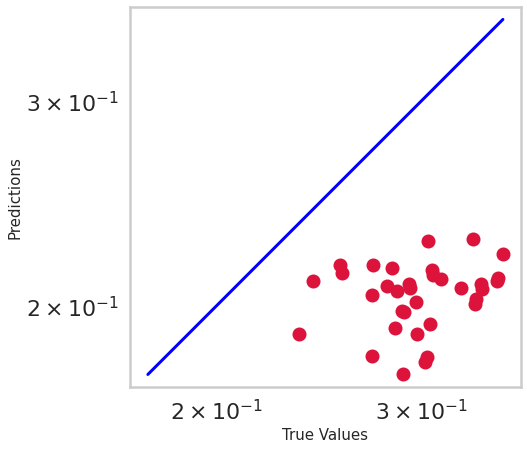

In [60]:
plt.figure(figsize=(7,7))
plt.scatter(actual, predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predict), max(actual))
p2 = min(min(predict), min(actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()